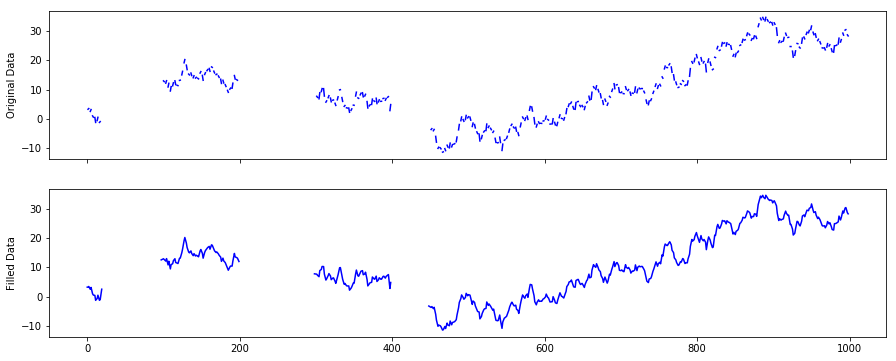

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1969)
%matplotlib inline
# from:
# https://stackoverflow.com/questions/36455083/working-with-nan-values-in-matplotlib

def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])

    if limit is not None:
        invalid = ~valid
        for n in range(1, limit+1):
            invalid[:-n] &= invalid[n:]
        filled[invalid] = np.nan

    return filled

x = np.random.normal(0, 1, 1000).cumsum()

# Set every third value to NaN
x[::3] = np.nan

# Set a few bigger gaps...
x[20:100], x[200:300], x[400:450] = np.nan, np.nan, np.nan

# Interpolate small gaps using numpy
filled = interpolate_gaps(x, limit=2)

# Let's plot the results
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15, 6))
axes[0].plot(x, color='blue')
axes[1].plot(filled, color='blue')

axes[0].set(ylabel='Original Data')
axes[1].set(ylabel='Filled Data')
plt.show()